## Import related API

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend. figure_format = 'retina'

### Read the data

In [117]:
def read(path):
    return pd.read_csv(path)

In [118]:
path = "WeeklyFinalData.csv"
finalData = read(path)

In [119]:
train = finalData

In [120]:
date = train["Date"]
train.drop("Date",axis=1,inplace=True)

### Min-max scaling 
The data is scaled to a fixed range [0,1]

In [121]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

### Look at distribution of data

In [122]:
data_columns = train.columns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

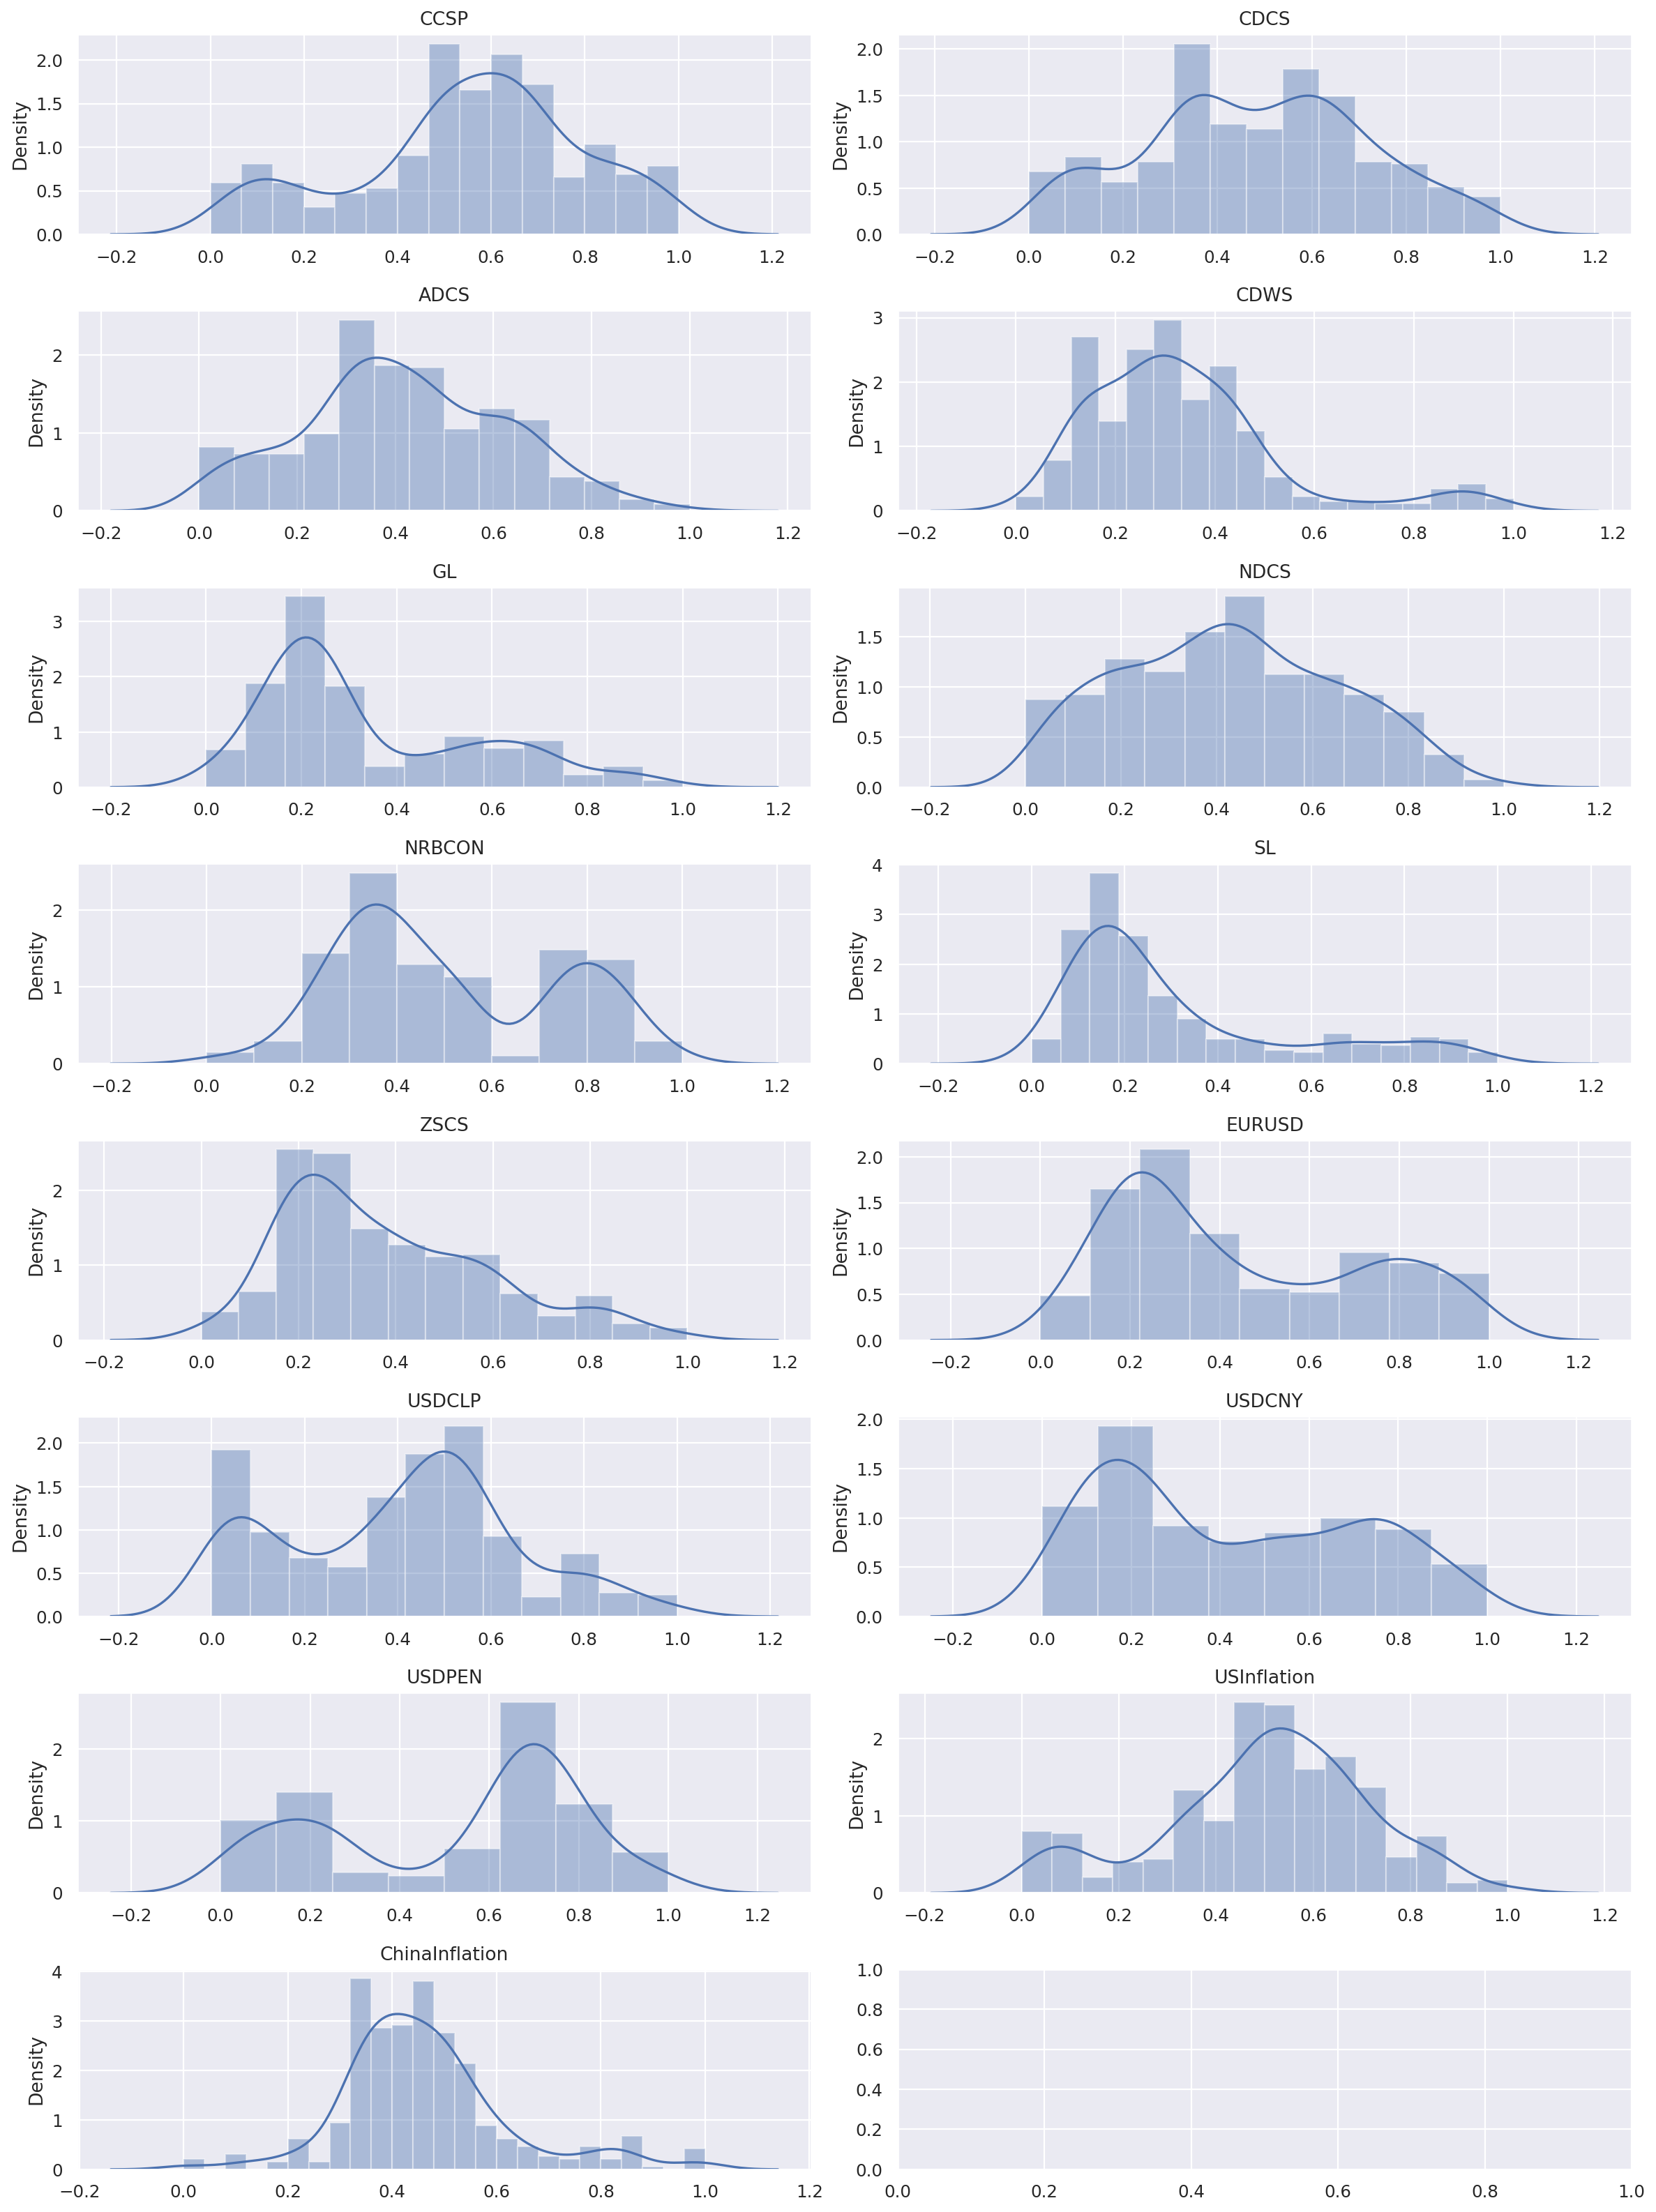

In [167]:
fig, axes = plt.subplots(
    nrows=int(round(15/2,0)), ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
)

sns.set()
for i in range(len(data_columns)):
    factor = np.array([train.iloc[:,i].values]).reshape(-1,1)
    data_scaled = sc.fit_transform(factor)
    sns.distplot(data_scaled, ax=axes[i//2, i%2]).set_title(data_columns[i])
    
fig.tight_layout()